In [19]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import netCDF4

obsfile = '/Users/teruhisa/Dropbox/Data/obweb/obweb/yodo_q1.csv'
title = 'Sta.5 Yodo R.'

df = pd.read_csv(obsfile, parse_dates=[['date','hour']], na_values='*')

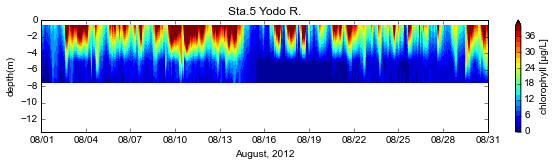

In [22]:
def t_contour(df, vname, interval, extend, units=None, time=None):

    if vname == 'salinity':
        pv = df.pivot(index='date_hour', columns='layer', values='salilnity')
    else:
        pv = df.pivot(index='date_hour', columns='layer', values=vname)
    date = pv.index
    depth = pv.columns
    if vname == 'chlorophyll':
        value = pv.values.T * 2.18
    else:
        value = pv.values.T

    #fig, ax = plt.subplots(figsize=(10,3))
    fig, ax = plt.subplots(figsize=(10,2), dpi=160)
    cf = ax.contourf(date, -depth, value, interval, extend=extend)
    cb = plt.colorbar(cf)
    
    if units is not None:
        cb.set_label('{} [{}]'.format(vname, units))
    else:
        cb.set_label(vname)
        
    ax.set_title(title)
    ax.set_xlabel('2012')
    ax.xaxis.set_major_formatter( DateFormatter('%m/%d') )
    ax.set_ylabel('depth(m)')
    ax.set_ylim(-13.5, 0)
    
    ax.set_xlabel('August, 2012')
    ax.set_xlim(dt.datetime(2012,8,1), dt.datetime(2012,8,31))
    
#t_contour(df, 'DO', np.arange(0,101,5), 'max', '%')
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
t_contour(df, 'chlorophyll', np.arange(0,41,2), 'max', 'μg/L')
plt.savefig('fig2a_yodo.png', bbox_inches='tight')

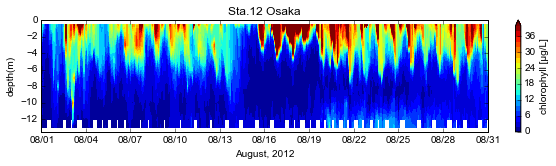

In [18]:
obsfile = '/Users/teruhisa/Dropbox/Data/obweb/obweb/osaka_q1.csv'
title = 'Sta.12 Osaka'

df = pd.read_csv(obsfile, parse_dates=[['date','hour']], na_values='*')
t_contour(df, 'chlorophyll', np.arange(0,41,2), 'max', 'μg/L')
plt.savefig('fig2b_osaka.png', bbox_inches='tight')